<a href="https://colab.research.google.com/github/rajnimassoun/aai550-mental-health-eda/blob/main/mental_health_tech_treatment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We read the data from the CSV file into a pandas DataFrame, and
remove columns: timestamps or free-text comments, because they don’t help with analysis.

We check the types of columns to find which ones are numeric and which are categorical.

We look at how many unique values each column has, to understand how complex each one is.

We clean the column names by converting everything to lowercase and replacing spaces with underscores. This helps keep our code consistent and error-free later.

We check for missing values in each column, so we know which parts of our data need to be filled in or fixed.

Then we fill in missing values in the columns: work_interfere, self_employed using the  the mode.This prevents us from losing data when we train the model later.

Finally, we create a new column called treatment_binary — this is our target variable which is to predict whether a person will seek treatment 1 or not 0, based on their demographic and workplace factors.:
This step turns our problem into a binary classification task yes/no prediction.

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)

In [93]:
# Read the CSV file into a DataFrame
# df = pd.read_csv("../../data/raw/survey.csv", sep=",")
df = pd.read_csv("survey.csv", sep=",")

In [94]:
# Stats by column
df.describe(include="all").T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1259,1246,2014-08-27 12:31:41,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1259.0,NaN,NaN,NaN,79428148.311358,2818299442.981952,-1726.0,27.0,31.0,36.0,99999999999.0
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,744,45,CA,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1241,2,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,995,4,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_employees,1259,6,6-25,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Drop unnecessary columns
drop_cols = ["Timestamp", "comments"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [96]:
# Count unique values in categorical columns
{column: len(df[column].unique()) for column in df.select_dtypes(object).columns}

{'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 3,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 5,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [97]:
# Categorical string search
# Look at object (string) columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
print(cat_cols)

# See unique values for each categorical column
for col in cat_cols:
    uniques = df[col].dropna().unique()
    if len(uniques) < 20:   # only print small sets
        print(f"\n{col}: {uniques}")

['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

self_employed: ['Yes' 'No']

family_history: ['No' 'Yes']

treatment: ['Yes' 'No']

work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes']

no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

remote_work: ['No' 'Yes']

tech_company: ['Yes' 'No']

benefits: ['Yes' "Don't know" 'No']

care_options: ['Not sure' 'No' 'Yes']

wellness_program: ['No' "Don't know" 'Yes']

seek_help: ['Yes' "Don't know" 'No']

anonymity: ['Yes' "Don't know" 'No']

leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']

mental_health_consequence: ['No' 'May

In [98]:
# Clean column names: strip, lowercase, replace spaces with underscores
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(r"\s+", "_", regex=True)
)
df.columns[:20]  # preview

Index(['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers'],
      dtype='object')

In [99]:
# Check for missing values
na_counts = df.isna().sum()
mask = na_counts > 0
summary = (
    pd.DataFrame({
        "missing": na_counts[mask],
        "pct": (na_counts[mask] / len(df) * 100).round(2)
    })
    .sort_values("pct", ascending=False)
)
print(summary)

                missing    pct
state               515  40.91
work_interfere      264  20.97
self_employed        18   1.43


In [100]:
# Most frequent value in 'work_interfere'
mode_work_interfere = df['work_interfere'].mode().iat[0]
print("Most common value in 'work_interfere':", mode_work_interfere)

# Fill missing values in 'work_interfere' with the mode
print("Filling missing 'work_interfere' with:", mode_work_interfere)
df['work_interfere'] = df['work_interfere'].fillna(mode_work_interfere)

Most common value in 'work_interfere': Sometimes
Filling missing 'work_interfere' with: Sometimes


In [101]:
# Most common value in 'self_employed' column
mode_self_employed = df['self_employed'].mode().iat[0]
print("Most common value in 'self_employed':", mode_self_employed)

# Fill missing values in 'self_employed' with the mode
print("Filling missing 'self_employed' with:", mode_self_employed)
df['self_employed'] = df['self_employed'].fillna(mode_self_employed)

Most common value in 'self_employed': No
Filling missing 'self_employed' with: No


In [102]:
# Convert 'treatment' to binary
df = df[df["treatment"].isin(["Yes", "No"])]
df["treatment_binary"] = (df["treatment"] == "Yes").astype(int)
df["treatment_binary"].value_counts()

,count
treatment_binary,
1,637
0,622


we create small functions that will Convert all yes/no-type answers into just “Yes” or “No”.

Group many gender responses (like “male”, “M”, “man”, “cis male”) into one of three categories:
Male, Female, or Other/Non-binary.

Remove people with unrealistic ages (we only keep ages between 18 and 100).

This makes the data more uniform and easier for the model to understand.
The result is a cleaned dataset where similar answers are grouped correctly and missing or inconsistent data is fixed.

In [103]:
# Check cateorical columns
categorical_cols = ["self_employed", "family_history", "remote_work", "tech_company", "obs_consequence"]

for col in categorical_cols:
    if col in df.columns:
        print(col, "→", df[col].unique()[:10])

self_employed → ['No' 'Yes']
family_history → ['No' 'Yes']
remote_work → ['No' 'Yes']
tech_company → ['Yes' 'No']
obs_consequence → ['No' 'Yes']


In [104]:
def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Standardize column names: lowercase, underscores, stripped."""
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r"\s+", "_", regex=True)
    )
    return df

In [105]:
def normalize_yesno(val):
    """Normalize yes/no style responses to 'Yes'/'No'."""
    if pd.isna(val):
        return pd.NA
    v = str(val).strip().lower()
    if v in {"yes", "y", "true", "1"}:
        return "Yes"
    if v in {"no", "n", "false", "0", "nope", "nah"}:
        return "No"
    return pd.NA


In [106]:
def clean_gender(val):
    """Map gender text into Male, Female, Other/Non-binary."""
    if pd.isna(val):
        return "Unknown"
    v = str(val).strip().lower()
    male = {"male", "m", "man", "cis male", "male-ish", "cis man",
            "maile", "mal", "male (cis)", "msle", "mail", "malr"}
    female = {"female", "f", "woman", "cis female", "cis woman",
              "femake", "femail", "cis-female/femme", "female (cis)"}
    if v in male:
        return "Male"
    if v in female:
        return "Female"
    return "Other/Non-binary"

In [107]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """Apply all cleaning rules."""
    df = clean_columns(df)

    # normalize key categorical columns
    for col in ["treatment", "self_employed", "family_history",
                "remote_work", "tech_company", "obs_consequence"]:
        if col in df.columns:
            df[col] = df[col].map(normalize_yesno)

    # clean gender
    if "gender" in df.columns:
        df["gender_clean"] = df["gender"].map(clean_gender)

    # handle age (reasonable range)
    if "age" in df.columns:
        df = df[(df["age"] >= 18) & (df["age"] <= 100)]

    # reset index
    df = df.reset_index(drop=True)

    return df

In [108]:
# Apply all cleaning steps
df = clean_data(df)

In [109]:
# summary
print("\n, CLEANED DATA PREVIEW:")
print(df.head(10))  # first 10 rows


print("\n, SHAPE:", df.shape)

print("\nMissing values (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

if "treatment" in df.columns:
    print("\nTreatment counts:")
    print(df["treatment"].value_counts(dropna=False))

if "gender_clean" in df.columns:
    print("\nGender distribution:")
    print(df["gender_clean"].value_counts(dropna=False))


, CLEANED DATA PREVIEW:
   age  gender         country state self_employed family_history treatment  \
0   37  Female   United States    IL            No             No       Yes   
1   44       M   United States    IN            No             No        No   
2   32    Male          Canada   NaN            No             No        No   
3   31    Male  United Kingdom   NaN            No            Yes       Yes   
4   31    Male   United States    TX            No             No        No   
5   33    Male   United States    TN            No            Yes        No   
6   35  Female   United States    MI            No            Yes       Yes   
7   39       M          Canada   NaN            No             No        No   
8   42  Female   United States    IL            No            Yes       Yes   
9   23    Male          Canada   NaN            No             No        No   

  work_interfere    no_employees remote_work tech_company    benefits  \
0          Often            6-25

In [110]:
df

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment_binary,gender_clean
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,1,Female
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,0,Male
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,0,Male
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,1,Male
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,1,Male
1247,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,1,Male
1248,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,1,Male
1249,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,0,Female


# **EDA**
Before building a model, we explore the data visually to understand how different factors relate to mental health treatment.

We do this by:

Plotting the overall number of people who did and did not seek treatment.

Comparing treatment responses by gender to see if there are visible differences.

Grouping ages into age ranges and comparing treatment rates for each group.

Looking at how workplace factors affect whether people seek treatment.

These charts help us visually see patterns or inequalities that might later help our model make better predictions.

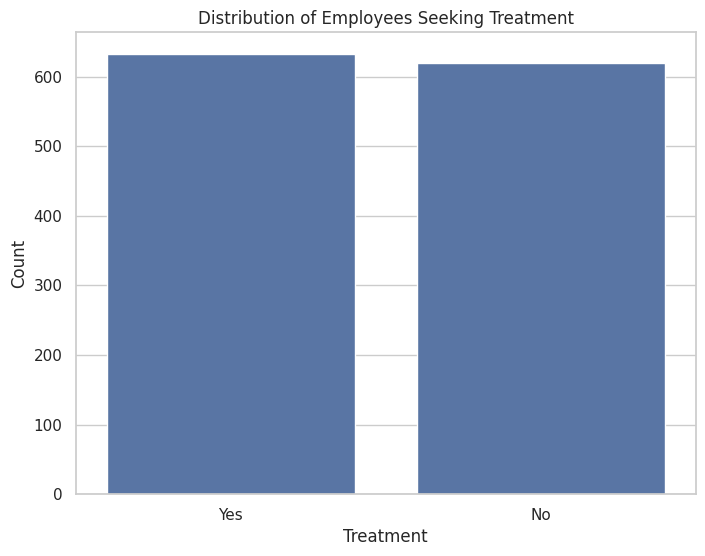

In [111]:
import seaborn as sns
sns.set(style="whitegrid")

# Treatment distribution
plt.figure(figsize=(8,6))
sns.countplot(x='treatment', data=df)
plt.title('Distribution of Employees Seeking Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


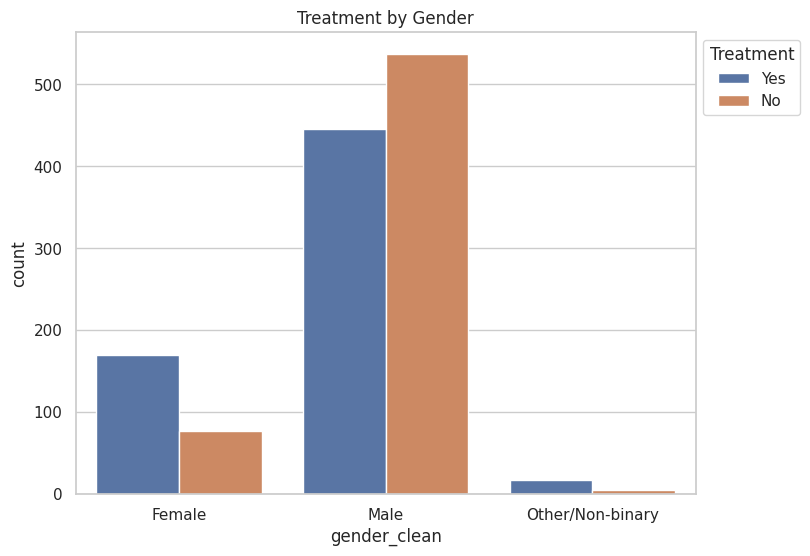

In [112]:
# Visualizing treatment distribution by gender
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gender_clean', hue='treatment')
plt.title('Treatment by Gender')
plt.legend(title='Treatment', loc='upper left', bbox_to_anchor=(1,1))
plt.show()

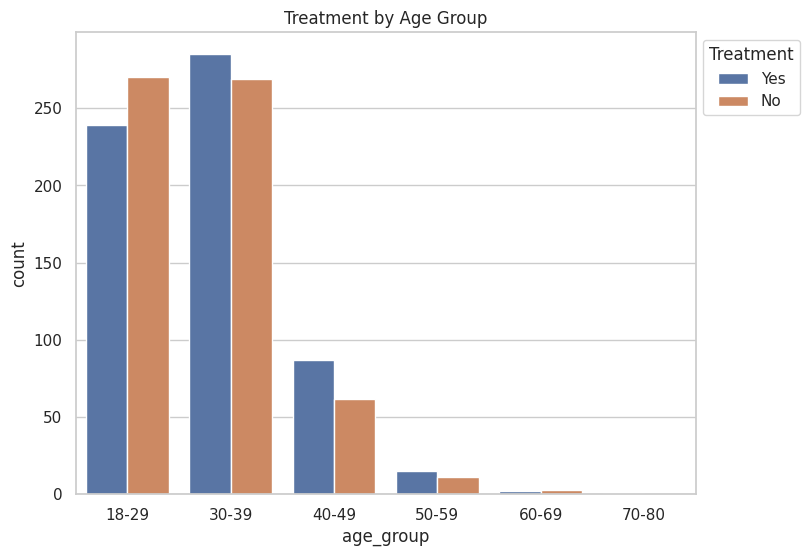

In [113]:
# Treatment by Age Group
import seaborn as sns
df['age_group'] = pd.cut(df['age'], bins=[18,29,39,49,59,69,80], labels=['18-29','30-39','40-49','50-59','60-69','70-80'])
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='age_group', hue='treatment')
plt.title('Treatment by Age Group')
plt.legend(title='Treatment', loc='upper left', bbox_to_anchor=(1,1))
plt.show()



Crosstab: self_employed vs treatment
treatment            No       Yes
self_employed                    
No             0.497746  0.502254
Yes            0.471831  0.528169


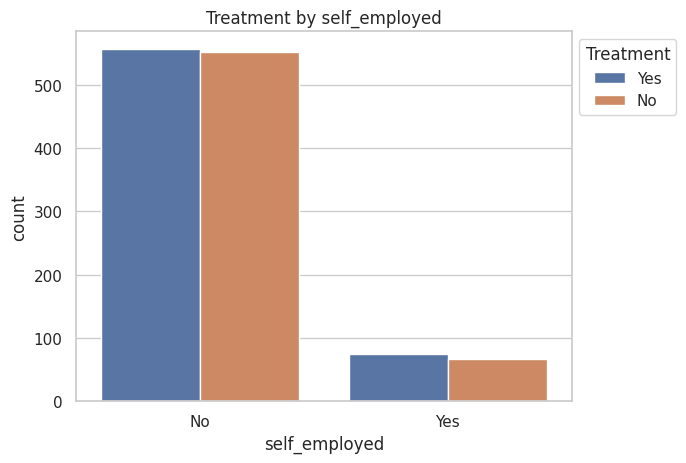


Crosstab: work_interfere vs treatment
treatment             No       Yes
work_interfere                    
Never           0.858491  0.141509
Often           0.150000  0.850000
Rarely          0.294798  0.705202
Sometimes       0.502755  0.497245


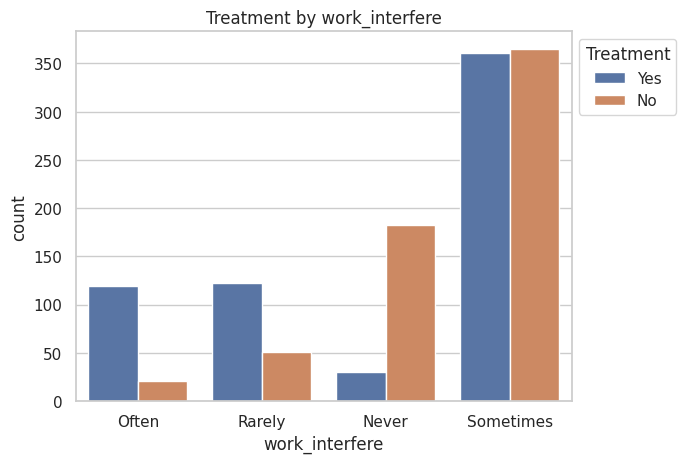


Crosstab: care_options vs treatment
treatment           No       Yes
care_options                    
No            0.587174  0.412826
Not sure      0.607029  0.392971
Yes           0.309795  0.690205


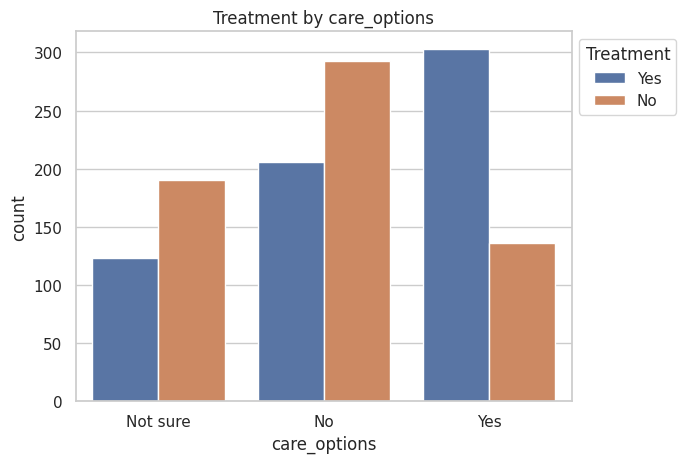


Crosstab: wellness_program vs treatment
treatment               No       Yes
wellness_program                    
Don't know        0.566845  0.433155
No                0.501792  0.498208
Yes               0.409692  0.590308


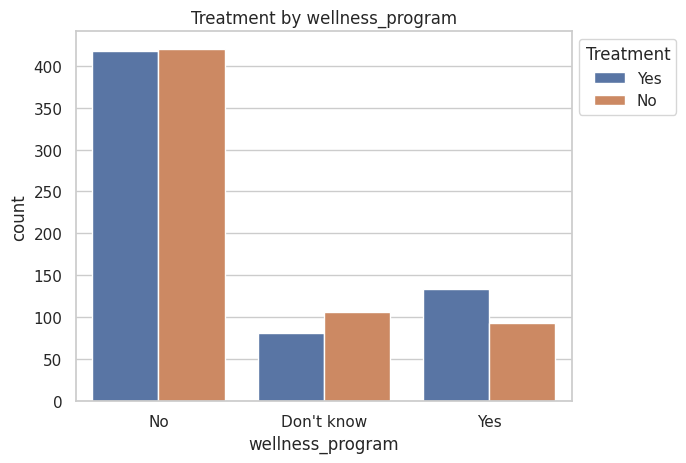


Crosstab: mental_health_consequence vs treatment
treatment                        No       Yes
mental_health_consequence                    
Maybe                      0.470588  0.529412
No                         0.568789  0.431211
Yes                        0.409722  0.590278


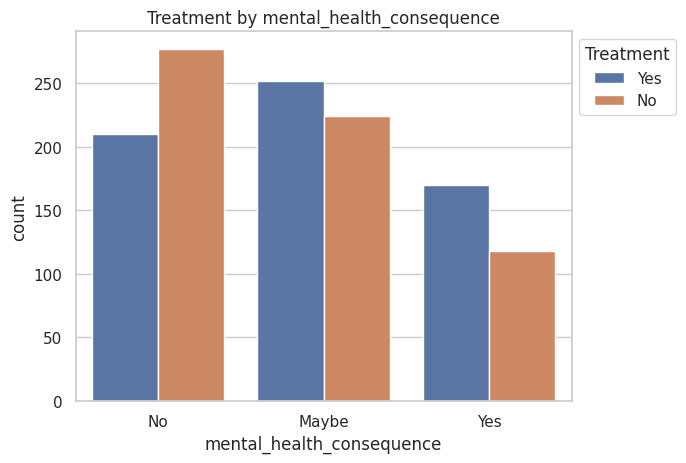


Crosstab: mental_health_interview vs treatment
treatment                      No       Yes
mental_health_interview                    
Maybe                    0.603865  0.396135
No                       0.474576  0.525424
Yes                      0.439024  0.560976


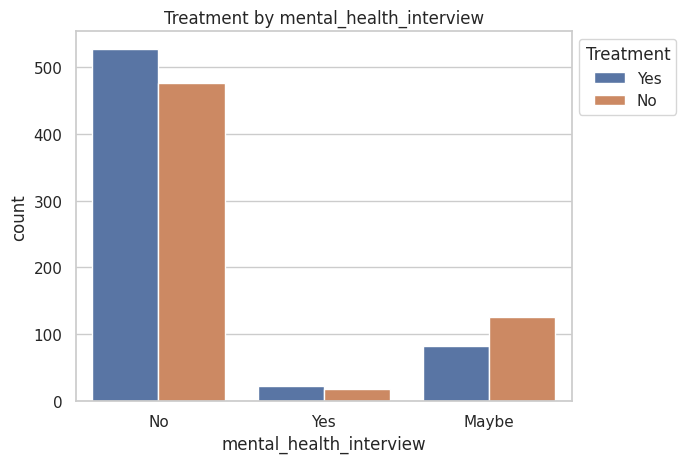


Crosstab: mental_vs_physical vs treatment
treatment                 No       Yes
mental_vs_physical                    
Don't know          0.548780  0.451220
No                  0.408284  0.591716
Yes                 0.489676  0.510324


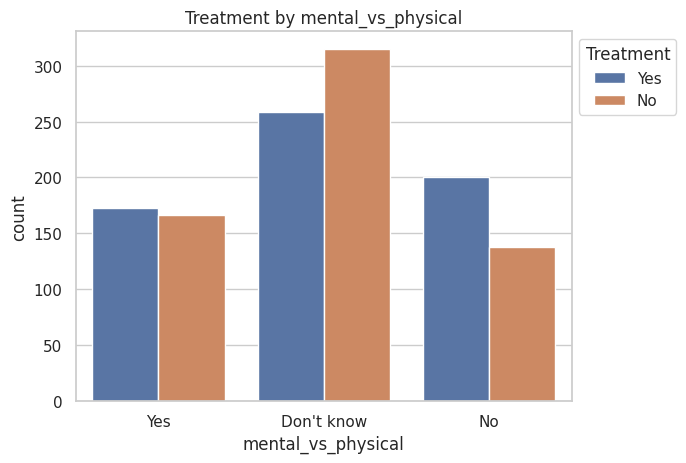

In [114]:
# Automatically select all columns related to workplace factors
work_cols = [col for col in df.columns if 'care' in col or 'wellness' in col or 'mental' in col]
categorical_cols = ['self_employed', 'work_interfere'] + work_cols

for col in categorical_cols:
    print(f"\nCrosstab: {col} vs treatment")
    print(pd.crosstab(df[col], df['treatment'], normalize='index'))

    sns.countplot(data=df, x=col, hue='treatment')
    plt.title(f'Treatment by {col}')
    plt.legend(title='Treatment', loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

**Correlation and Statistical Tests**

Next, we check for relationships between variables using statistics.
We calculate:

Correlation heatmaps for numeric columns.

T-tests to compare the average age between those who did and didn't seek treatment.

Chi-square tests to see if there's a statistical connection between each categorical feature and treatment.

For example, we can test whether “family history of mental illness” is significantly related to whether someone seeks treatment.
If the p-value from these tests is less than 0.05, that feature is likely meaningful for our model.

This step helps us identify which variables are truly useful.

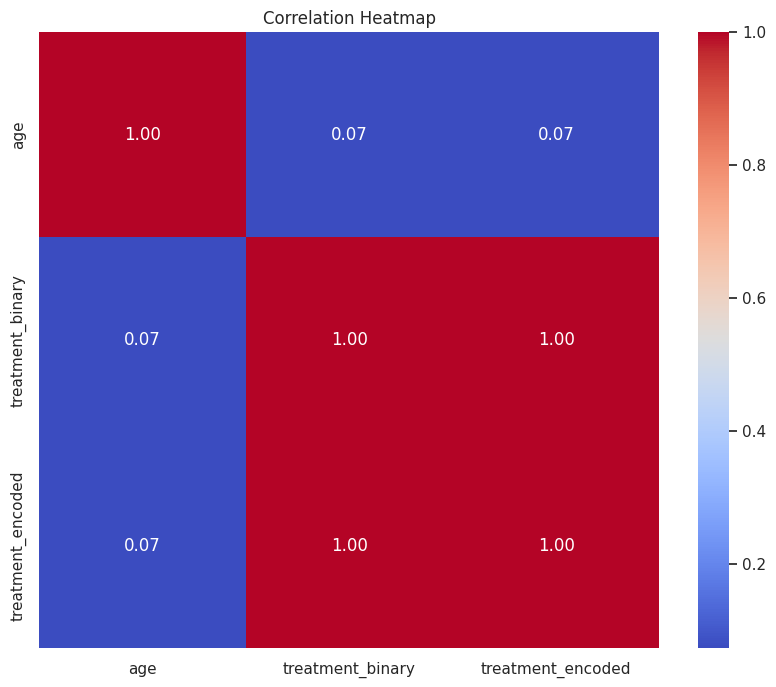

In [115]:
# Correlation Heatmap

df['treatment_encoded'] = df['treatment'].map({'Yes':1, 'No':0})
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [116]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
# split age by treatment group
age_treat = df[df['treatment_encoded']==1]['age']
age_no_treat = df[df['treatment_encoded']==0]['age']

# Run T-test
t_statistic, p_value = ttest_ind(age_treat, age_no_treat)
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 2.609
P-value: 0.009


In [117]:
# Automatically select all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# exculde treatement
categorical_cols = [col for col in categorical_cols if col != 'treatment_encoded']
# Run Chi-square tests for each categorical column
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['treatment_encoded'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\nChi-square test for {col.replace('_',' ').title()}: Chi2 = {chi2:.2f}, p = {p:.3f}")


Chi-square test for Gender: Chi2 = 87.05, p = 0.000

Chi-square test for Country: Chi2 = 68.06, p = 0.015

Chi-square test for State: Chi2 = 51.43, p = 0.206

Chi-square test for Self Employed: Chi2 = 0.24, p = 0.622

Chi-square test for Family History: Chi2 = 175.96, p = 0.000

Chi-square test for Treatment: Chi2 = 1247.00, p = 0.000

Chi-square test for Work Interfere: Chi2 = 206.63, p = 0.000

Chi-square test for No Employees: Chi2 = 8.82, p = 0.117

Chi-square test for Remote Work: Chi2 = 0.77, p = 0.381

Chi-square test for Tech Company: Chi2 = 1.16, p = 0.282

Chi-square test for Benefits: Chi2 = 63.70, p = 0.000

Chi-square test for Care Options: Chi2 = 92.91, p = 0.000

Chi-square test for Wellness Program: Chi2 = 10.62, p = 0.005

Chi-square test for Seek Help: Chi2 = 10.71, p = 0.005

Chi-square test for Anonymity: Chi2 = 25.91, p = 0.000

Chi-square test for Leave: Chi2 = 28.88, p = 0.000

Chi-square test for Mental Health Consequence: Chi2 = 20.12, p = 0.000

Chi-square te

In [118]:
# Summary Tables

def treatment_summary(col):
    summary = pd.crosstab(df[col], df['treatment'], normalize='index') * 100
    summary = summary.round(1)
    return summary[['Yes','No']]

print("\nTreatment by Gender (%):")
print(treatment_summary('gender_clean'))

print("\nTreatment by Age Group (%):")
print(treatment_summary('age_group'))


Treatment by Gender (%):
treatment          Yes    No
gender_clean                
Female            68.8  31.2
Male              45.3  54.7
Other/Non-binary  77.3  22.7

Treatment by Age Group (%):
treatment    Yes    No
age_group             
18-29       47.0  53.0
30-39       51.4  48.6
40-49       58.4  41.6
50-59       57.7  42.3
60-69       40.0  60.0
70-80      100.0   0.0


**Feature Engineering**
Now we prepare the data for the machine learning model.

We will remove columns that could cause data leakage like “treatment” itself or columns directly related to the outcome.

Remove or simplify columns that are not useful or too detailed like exact country names — we group them into “US” vs “Non-US”.

Create new simplified columns like country_group and gender_group to make features easier for the model.

Separate the dataset into:

X(train data): the input features the things we'll use to predict,

y(test data): the target treatment_binary, which we want to predict.

At the end of this section, we clearly know which variables the model will use.

In [119]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#  Define Target and Features
target = "treatment_binary"

# Drop the target, any versions of it, and any leaky/unnecessary columns
features_to_drop = [
    target,
    "treatment",
    "treatment_encoded", # <-- THE CRUCIAL FIX IS HERE
    "gender",
    "gender_clean",
    "country",
    "state",
    "age_group",
    "work_interfere"
]

X = df.drop(columns=features_to_drop, errors='ignore')
y = df[target]


# Simplify Remaining Features
if "country" in df.columns:
    X["country_group"] = df["country"].apply(lambda c: "US" if c == "United States" else "Non-US")

if "gender_clean" in df.columns:
     X["gender_group"] = df["gender_clean"].replace({"Other/Non-binary": "Other"})

X = X.drop(columns=['country', 'gender_clean'], errors='ignore')


# Re-identify Feature Types AFTER cleaning
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_features = X.select_dtypes(include=["number"]).columns.tolist()

print("Categorical features for model:", cat_features)
print("Numeric features for model:", num_features)

Categorical features for model: ['self_employed', 'family_history', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'country_group', 'gender_group']
Numeric features for model: ['age']


**Preprocessing and Transformation**

Before we train the model, we must make sure the data is in the right format.

Machine learning models cannot handle text directly, so we use One-Hot Encoding to convert text categories into numbers.
For example: gender_group = Male, Female, Other becomes three numeric columns like gender_group_Male, etc.

We standardize numeric features like age using a StandardScaler, so all numbers are on a similar scale (this helps logistic regression perform better).

We combine both steps in a ColumnTransformer, so that:

Categorical features go through the OneHotEncoder,

Numeric features go through the StandardScaler,

Everything else is passed through as-is.

This preprocessing ensures our model sees clean, consistent numerical data.

In [120]:
# Create the Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", drop='first'), cat_features),
        ("num", StandardScaler(), num_features)
    ],
    remainder='passthrough'
)


**Splitting the Data**

We divide our dataset into two parts:

Training set (75%) — used to train the model.

Testing set (25%) — used to check how well the model performs on unseen data.

We use stratify=y so that both sets have a similar proportion of “Yes” and “No” responses.
We also fix a random seed (random_state=42) so that results can be reproduced.

In [121]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

**Building and Tuning the Model**

We use Logistic Regression for predicting binary outcomes (like Yes/No).
We choose it because:

It's interpretable i.e we can see which features matter most.

It's less likely to overfit compared to complex models.

It works well with standardized data.

We use GridSearchCV, which automatically tests different settings called hyperparameters (they control how the model learns) to find the best model:

It tests both L1 and L2 regularization to control complexity.L1 and L2 are techniques that prevent the model from getting overfitted.

L1 (Lasso) removes weak features completely andsets them to zero.

L2 (Ridge) keeps all features but makes them less powerful.
In our model, L1 worked best — meaning only the most important factors were kept for predicting whether someone sought mental health treatment.

It tries different values of “C” (the strength of regularization).

The grid search uses 5-fold cross-validation, meaning it splits the training data into 5 parts, trains the model 5 times, and averages the results.
This gives a stable estimate of how the model will perform on new data.

In [122]:
# Define the Model Pipeline and Grid Search
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear", class_weight='balanced'))
])

param_grid = {
    "classifier__penalty": ["l1", "l2"],
    "classifier__C": [0.01, 0.05, 0.1, 0.5, 1]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['self_employed',
                                                                          'family_history',
                                                                          'no_employees',
                                                                          'remote_work',
                                                                          'tech_company',
                                                                          'benefits',
                                                                          'care_options',
                                                                          'wellness_program',
                                                                          'seek_help',
                                                                          'anonymity',
                                                                          'leave',
                                                                          'mental_health_conse...
                                                                          'mental_health_interview',
                                                                          'phys_health_interview',
                                                                          'mental_vs_physical',
                                                                          'obs_consequence',
                                                                          'country_group',
                                                                          'gender_group']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['age'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='roc_auc')

**Model Evaluation**

Once the best model is found, we test it on the unseen test set.
We check:

ROC-AUC score: measures how well the model distinguishes between “Yes” and “No” cases.


Precision, recall, and F1-score: measure how accurate the model's predictions are for each class.

Both “Yes” and “No” classes have about 0.74, showing a balanced model.

Classification report: summarizes all these metrics neatly.

These results show that the model is both accurate and generalizable

In [123]:
# Evaluate the Results
print(f"Best cross-validation ROC-AUC score: {grid.best_score_:.4f}")
print(f"Best parameters: {grid.best_params_}")

from sklearn.metrics import roc_auc_score, classification_report
y_pred_proba = grid.predict_proba(X_test)[:, 1]
test_score = roc_auc_score(y_test, y_pred_proba)

print(f"Test Set ROC-AUC Score: {test_score:.4f}")

print("\nClassification Report on Test Set:")
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

Best cross-validation ROC-AUC score: 0.7612
Best parameters: {'classifier__C': 0.5, 'classifier__penalty': 'l1'}
Test Set ROC-AUC Score: 0.7948

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       155
           1       0.75      0.73      0.74       158

    accuracy                           0.74       313
   macro avg       0.74      0.74      0.74       313
weighted avg       0.74      0.74      0.74       313



**Model Interpretation: Feature Importance**

After training our logistic regression model, we looked at feature importance to see what drives mental health treatment.
Positive coefficients increase the likelihood of seeking treatment, and negative coefficients decrease it.
The top predictors include family history, work interference, and mental health consequences at work.
This tells us which factors are most influential for our model's predictions and helps us understand the key drivers of treatment-seeking behavior.


Model Interpretation: Feature Importance 
                         Feature  Coefficient
1             family_history_Yes     1.433792
28                 coworkers_Yes     0.876575
12              care_options_Yes     0.745059
21          leave_Very difficult     0.743882
39             gender_group_Male    -0.639897
19      leave_Somewhat difficult     0.566847
30                supervisor_Yes    -0.392210
23  mental_health_consequence_No    -0.373242
34     phys_health_interview_Yes     0.342205
6    no_employees_More than 1000    -0.337457
10                  benefits_Yes     0.311927
37           obs_consequence_Yes     0.303640
18                 anonymity_Yes     0.288316
27        coworkers_Some of them     0.269253
31    mental_health_interview_No     0.174627
15                  seek_help_No    -0.149179
29       supervisor_Some of them    -0.130161
33      phys_health_interview_No    -0.120517
32   mental_health_interview_Yes     0.108214
41                           age     

/tmp/ipython-input-2448973634.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=plot_df, palette='viridis')


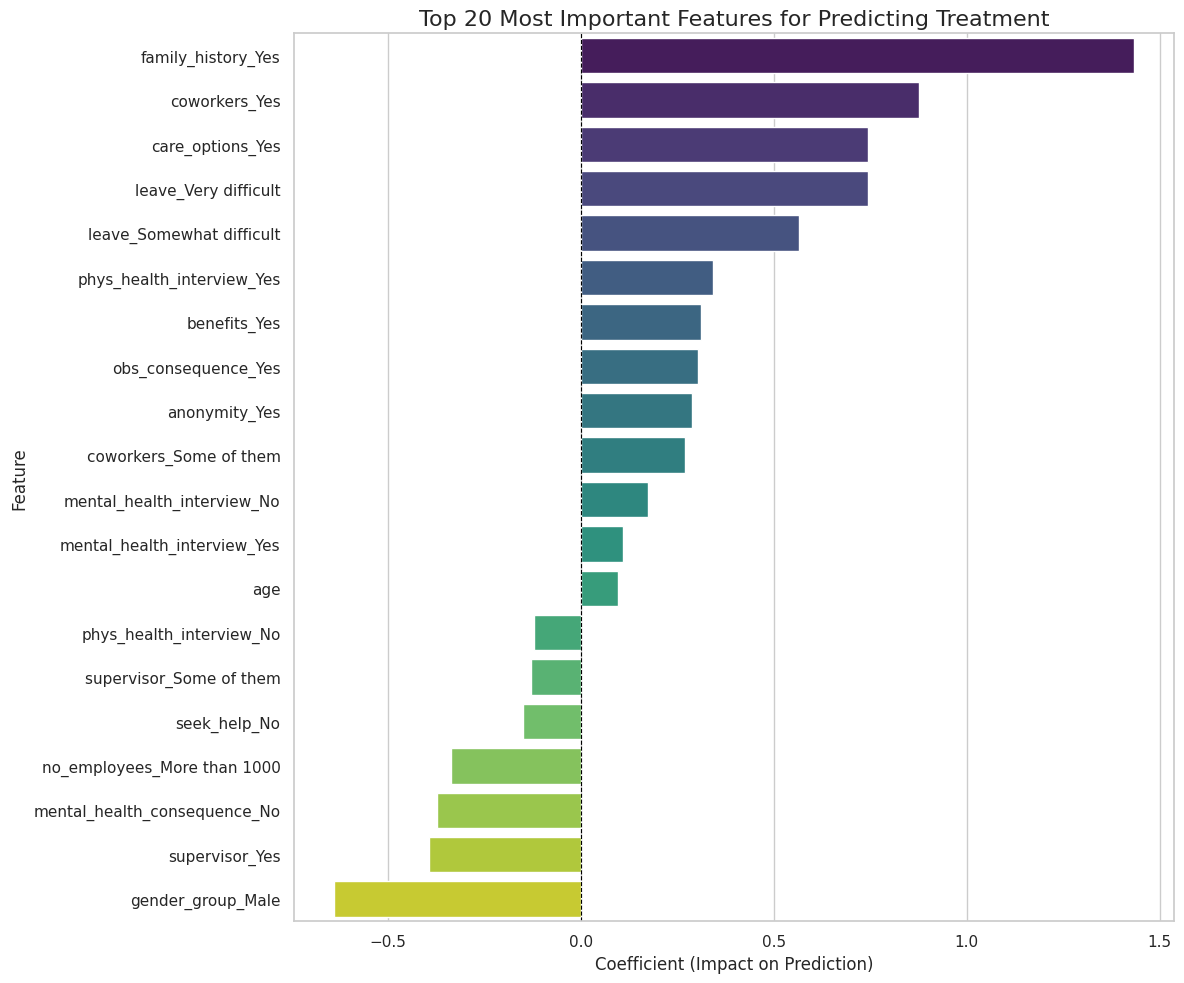

In [124]:
# Interpret Model Results: Feature Importance
print("\nModel Interpretation: Feature Importance ")

# Get the best trained pipeline from your grid search
best_pipeline = grid.best_estimator_

# Get the ColumnTransformer from the pipeline
preprocessor = best_pipeline.named_steps['preprocessor']

# Get the trained Logistic Regression model from the pipeline
model = best_pipeline.named_steps['classifier']

# Get the feature names from the OneHotEncoder
# These are the new columns created from your original categorical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)

# The numeric features don't change names
num_feature_names = num_features

# Combine the one-hot encoded feature names and the numeric feature names in the correct order
all_feature_names = list(ohe_feature_names) + list(num_feature_names)

# Get the coefficients from the model
coefficients = model.coef_[0]

# Create a pandas DataFrame to view the features and their coefficients
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the coefficient's absolute value to see the most impactful features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df[['Feature', 'Coefficient']].head(20))


# Visualize the Most Important Features

# Select the top 20 most impactful features for plotting
plot_df = importance_df.head(20).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=plot_df, palette='viridis')
plt.title('Top 20 Most Important Features for Predicting Treatment', size=16)
plt.xlabel('Coefficient (Impact on Prediction)', size=12)
plt.ylabel('Feature', size=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

Our model predicts whether an employee seeks mental health treatment based on demographic and workplace factors.
The strongest predictors are family history of mental health conditions, work interference, and negative consequences of mental health at work.
The model performs well on unseen data and is interpretable because it automatically ignored less important features.
Essentially, it tells us which factors most influence treatment-seeking behavior and can guide workplace mental health initiatives.